# Assignment 02 
* 2019220177 Seungwook Oh

In [1]:
from google.colab import drive
from os.path import join
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


In [5]:
!git status
!git checkout develop
!git branch

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	assignment02.ipynb

nothing added to commit but untracked files present (use "git add" to track)
Switched to branch 'develop'
* develop
  master


## Linear Regression

### Import library


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import time

### 1. Input Data
* a straight line that is the graph of a linear function (in blue color)
* a set of points that have random perturbations with respect to the straight line (in black color)

In [0]:
# generate random data-set
np.random.seed(int(time.time()))
x = np.random.rand(100,1)
y = 3 + 2*x + np.random.randn(100,1)  # Line : y = 3 + 2*3

x_l = np.linspace(0,1,100)
y_l = 3+ 2*x_l

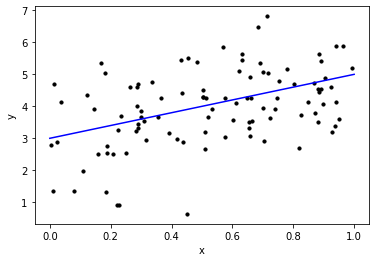

In [75]:
# plot
plt.scatter(x,y,s=10,c = 'black')
plt.plot(x_l,y_l, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
!git add .

In [77]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"
!git commit -m "Assignment02 : 1. Input data"

[develop da9a180] Assignment02 : 1. Input data
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite assignment02.ipynb (75%)


In [78]:
!git push origin develop

Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 18.91 KiB | 2.36 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SooonChang/MIMP
   7ae51fa..da9a180  develop -> develop


###  Define LinearRegression Class


In [0]:
class LinearRegression:

  def __init__(self, eta = 0.05, n_iterations = 100):
    self.eta = eta
    self.n_iterations = n_iterations
  
  def fit(self,x,y): ## fit model
    self.cost_ = []
    self.w0_ = []
    self.w1_ = []
    self.w0 = 0.0
    self.w1 = 1.0

    m = x.shape[0]

    for i in range(self.n_iterations):
      h = self.w0 + self.w1 * x
      residuals = h - y

      cost = np.sum((residuals**2)/2*m)
      self.cost_.append(cost)

      self.w0 -= (self.eta/m)*np.sum(residuals)
      self.w1 -= (self.eta/m)*np.dot(x.T,residuals)

      self.w0_.append(self.w0)
      self.w1_.append(self.w1)

    return self


  def predict(self,x): ## return predicted y

      return self.w0 + self.w1 * x
    
  def parameters(self): ## return cost, w0, w1 per iterations
      return self.cost_, self.w0_, self.w1_


In [136]:
regression_model = LinearRegression()
regression_model.fit(x,y)

### 2. Output results
* the set of points that have random perturbations with respect to the straight line (in black color)
* a straight line that is the graph of a solution obtained by linear regression (in red color)

In [0]:
y_pred = regression_model.predict(x)

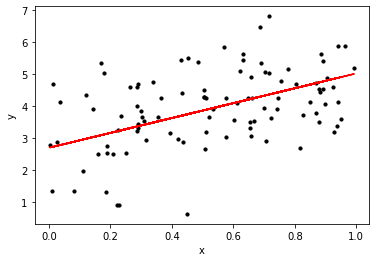

In [138]:
# plot
plt.scatter(x,y,s=10,c = 'black')
plt.plot(x,y_pred, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [83]:
# git commit
!git add . 
!git commit -m "Assignment02 : 2. Output results"

[develop 7931b42] Assignment02 : 2. Output results
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite assignment02.ipynb (84%)


In [84]:
!git push origin develop

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 18.83 KiB | 4.71 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://github.com/SooonChang/MIMP
   da9a180..7931b42  develop -> develop


### 3. Plotting the energy values
* the value of the objective function at every optimization step by the gradient descent algorithm (in blue color)
* the optimization should be performed until convergence

In [0]:
n = []
for i in range(100):
  n.append(i)
cost, w0, w1 = regression_model.parameters()

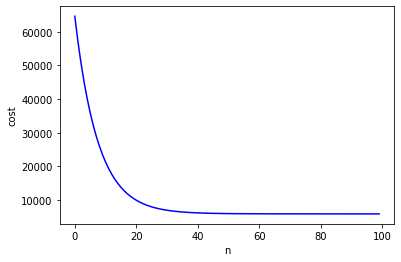

In [140]:
plt.plot(n,cost,c='b')
plt.xlabel('n')
plt.ylabel('cost')
plt.show()

In [120]:
# git commit
!git add .
!git commit -m "Assignment02 : 3. Plotting the energy values"
!git push origin develop

[develop 61a6861] Assignment02 : 3. Plotting the energy values
 1 file changed, 1 insertion(+), 1 deletion(-)
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 7.78 KiB | 1.94 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SooonChang/MIMP
   7931b42..61a6861  develop -> develop


### 4. Plotting the model parameters
* the value of the model parameters $\theta_0$ and $\theta_1$ at every optimization step (in red ($\theta_0$) and blue ($\theta_1$) colors)
* the optimization should be performed until convergence

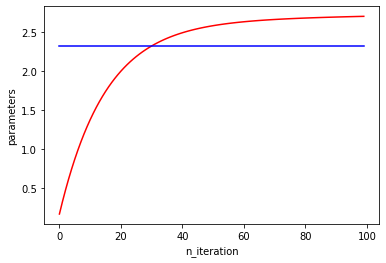

In [141]:
w1 = np.squeeze(w1,axis=2)
plt.plot(n,w0,c='r')
plt.plot(n,w1,c='b')
plt.xlabel('n_iteration')
plt.ylabel('parameters')
plt.show()